In [1]:
import pandas as pd
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def line(x,m,b):
    return m*x+b

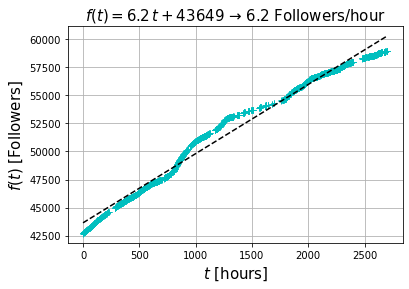

In [20]:
df=pd.read_json('followers.json')
#df=df[-20:].reset_index(drop=True)

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
#df=df[df['hours']>850].reset_index(drop=True)

plt.plot(df['hours'],df['followers'],'c+')

#Fit:
l,le=optimize.curve_fit(line,df['hours'],df['followers'],p0=[8,40000])
m,b=l
plt.plot(df['hours'],line(df['hours'],m,b),linestyle='--',color='k')
plt.title('$f(t)=%s\\,t+%s$ → %s Followers/hour' %(round(m,1),int(b),round(m,1)),fontsize=15)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
plt.savefig('followers.png')

In [21]:
df['Δf']=[0]+list(df.followers.values[1:]-df.followers.values[:-1])
df.iloc[-10:]#[-24*1:]#['Δf'].sum()

,followers,date_time,hours,Δf
2032,58946,2021-11-25 04:33:24.886,2694.442005,31
2033,58947,2021-11-25 05:33:28.246,2695.442938,1
2034,58946,2021-11-25 06:33:31.243,2696.443771,-1
2035,58946,2021-11-25 07:33:34.939,2697.444797,0
2036,58948,2021-11-25 08:33:38.970,2698.445917,2
2037,58949,2021-11-25 09:33:43.459,2699.447164,1
2038,58950,2021-11-25 10:33:47.990,2700.448423,1
2039,58952,2021-11-25 11:33:52.158,2701.449581,2
2040,58953,2021-11-25 12:33:55.793,2702.450590,1
2041,58957,2021-11-25 13:34:00.080,2703.451781,4


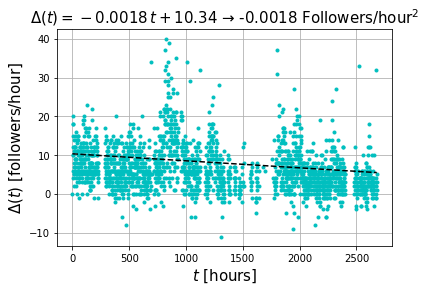

In [14]:
t=np.linspace(0,900)
dfl=df[df['Δf']<41]
plt.plot(dfl['hours'],dfl['Δf'],'c.')
ll,lle=optimize.curve_fit(line,df['hours'],df['Δf'],p0=[-0.1,15])
ml,bl=ll
plt.plot(df['hours'],line(df['hours'],ml,bl),linestyle='--',color='k')
#plt.plot(t,-0.01*t+10)
plt.title('$\Delta(t)=%s\\,t+%s$ → %s Followers/hour${}^2$' %(round(ml,4),round(bl,2),round(ml,4)),fontsize=15)
plt.ylabel('$\Delta(t)$ [followers/hour]',size=15)
plt.xlabel('$t$ [hours]',size=15)
plt.grid()

Prediction

$y=mx+b$ → $x=(y-b)/m$

In [15]:
def hours(y,m,b):
    return (y-b)/m

In [16]:
y=60000
h=int(round(hours(y,m,b),0))
h

2648

In [17]:
import datetime

In [18]:
t0=df.loc[0,'date_time']
print(f't0 → {t0}')
print(f'{t0+datetime.timedelta(hours=h)}')

t0 → 2021-08-04 22:06:53.668000
2021-11-23 06:06:53.668000


In [53]:
df['pred']=df['hours'].apply(lambda x: int(m*x+b)) 

Errores

In [54]:
Δm=np.sqrt(le[0,0])
Δb=np.sqrt(le[1,1])

In [55]:
m-Δm,m+Δm

(6.359824000116107, 6.396103810690577)

In [56]:
b-Δb,b+Δb

(43449.4847277492, 43500.876105420895)

In [57]:
df.iloc[-1]['hours']+10*24

2752.185526944465

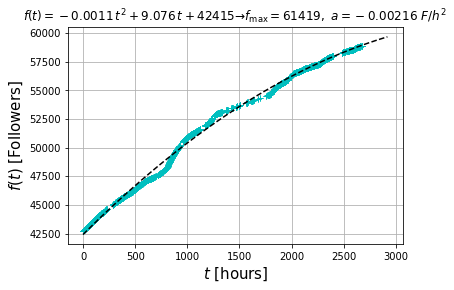

In [19]:
def curve(x,a,b,c):
    return a*x**2+b*x+c

l,le=optimize.curve_fit(curve,df['hours'],df['followers'],p0=[0.1,8,40000])

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
plt.plot(df['hours'],df['followers'],'c+')


l,le=optimize.curve_fit(curve,df['hours'],df['followers'],p0=[0.1,8,40000])
a,b,c=l


#Fit:
p=np.poly1d([a,b,c])
v=p.deriv()
tmax=v.roots[0]
t=np.linspace(0,df.iloc[-1]['hours']+10*24)


plt.plot(t,curve(t,a,b,c),linestyle='--',color='k')
plt.title('$f(t)=%s\\,t^2+%s\\,t+%s \\to f_{\\rm{max}}=%s,\\ a=%s\\ F/h^2$ ' 
          %(round(a,4),round(b,4),int(c),int(p(tmax)),2*round(a,5)),fontsize=12)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
plt.savefig('followers.png')

In [25]:
p(tmax)

61466.11214978367

In [26]:
tmax

4202.162319196189

In [27]:
days=tmax/24
days

175.09009663317454

In [47]:
import datetime

In [48]:
t=df.loc[0,'date_time']
t+datetime.timedelta(hours=tmax)

Timestamp('2022-01-26 09:41:41.422646')

Prediction:
$$F(t)=\frac{1}{2}at^2+v_0t+t_0$$

In [46]:
h=(60000-p).roots[-1]
t0=df.loc[0,'date_time']
print(f't0 → {t0}, t_end → {h}')
print(f'{t0+datetime.timedelta(hours=h)}')

t0 → 2021-08-04 22:06:53.668000, t_end → 3043.2177114289334
2021-12-09 17:19:57.429144


\begin{align}
f(x; \mu,s)  & = \frac{e^{-(x-\mu)/s}} {s\left(1+e^{-(x-\mu)/s}\right)^2} \\[4pt]
& =\frac{1}{s\left(e^{(x-\mu)/(2s)}+e^{-(x-\mu)/(2s)}\right)^2} \\[4pt]
& =\frac{1}{4s} \operatorname{sech}^2\left(\frac{x-\mu}{2s}\right).
\end{align}

In [30]:
from scipy import  misc
def logistic(x,A,μ,s):
    return A*np.exp( -(x-μ)/s  )/( s*(1 + np.exp( -(x-μ)/s  )   )  )**2

derivative=np.vectorize(misc.derivative)

t=np.linspace(0,5000,1000)
p0=[1000,100,10]
l,le=optimize.curve_fit(logistic,df['hours'],df['followers'],p0=p0)
A,μ,s=l
l

array([1.80791186e+12, 3.26731011e+03, 2.75963009e+03])

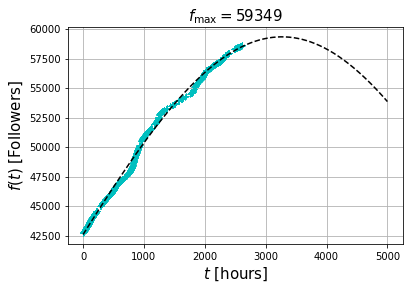

In [31]:
#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
plt.plot(df['hours'],df['followers'],'c+')

#fmax
dlogistic=derivative(lambda t: logistic(t,A,μ,s),t)
nt=dlogistic[dlogistic>0].shape[0]
lfmax=logistic( t[nt],A,μ,s ) 

#Fit:
plt.plot(t,logistic(t,A,μ,s),linestyle='--',color='k')
plt.title(r'$f_{\rm max}=%s$' %int(lfmax),fontsize=15)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
plt.savefig('followers.png')

In [30]:
optimize.curve_fit(logistic,df['hours'],df['followers'],p0=[100,1,1])

(array([ 2.63397320e+04,  1.47277454e+02, -1.15358078e+00]),
 array([[ 1.28865329e+11,  4.18163774e+03, -3.18762620e+06],
        [ 4.18163774e+03,  1.89696686e+02, -2.39869428e-01],
        [-3.18762620e+06, -2.39869428e-01,  9.32309317e+01]]))

In [129]:
t[nt]/24

63.7303970637304

In [170]:
import helium as hell
import pandas as pd
import time

In [26]:
df['followers'].sort_values().unique()

array([42696, 42706, 42716, ..., 56979, 56980, 56983])

In [28]:
pd.__version__

'1.3.0'